# Introduction
In this kernelI tried to train my model and get the best accuracy as I can. I tried different ephocs and different activation styles, after that I ended up with this values below.

1. [Loading Train and Test Data](#1)
1. [Arranging Train Data](#2)
1. [Traning Model](#3)
1. [Fitting Model on Train Data](#4)
1. [Arranging Test Data](#5)
1. [Fitting Model on Test Data](#6)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/mnist-in-csv/mnist_test.csv


<a id="1"><br></a>
## Loading Train and Test Data

In [2]:
train=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see from the table above, we can easily say that every photo of digits made from 28x28 pixels and the first column of the data is represents the digit.

In [3]:
test=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


According to our expectations we have same condition like in the train data frame.

<a id="2"><br></a>
## Arranging Train Data

Now for seeing a sample inside the train we are going to make one of the pics as a matrix. After that reshape it and print it.

7


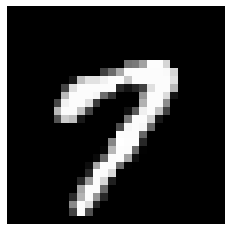

In [4]:
print(train.iloc[15][0]) #this is for seeing which number we are picturing.
img=train.iloc[15][1:].to_numpy() #you can also use as_matrix(), but the last time that I wanted to use it I've got a problem. Because of that, I used to_numpy(). 
                                  #I didn't get rid of the label part yet. Fot just using pixels we started from the 2nd([1]) element of one column.
img=np.reshape(img,(28,28))
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

Now we are going to seperate our labels from pixels.

In [5]:
X_train=train.drop("label",axis=1)
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train=train.label
Y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

Now we can easily see how many samples do we have from each number.

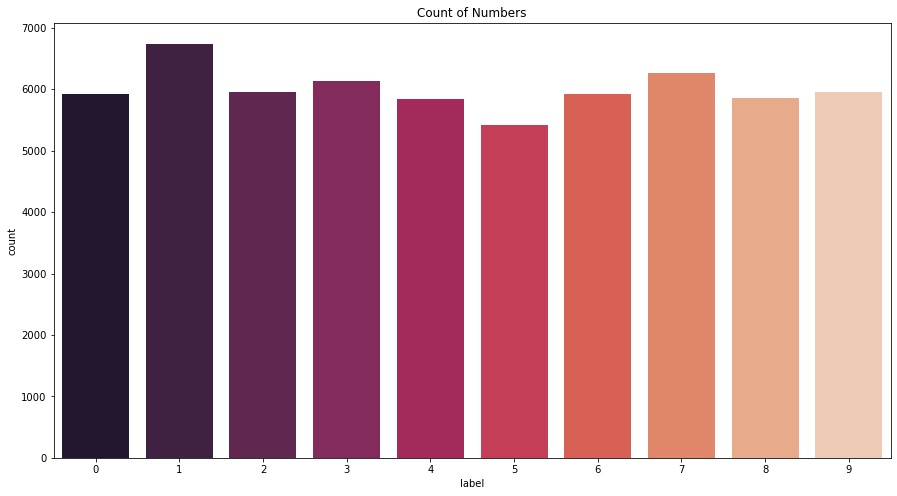

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(Y_train,palette="rocket")
plt.title("Count of Numbers")
plt.show()


Now we are going to initialize our pixel values

In [8]:
X_train=X_train/255.0
X_train.shape

(60000, 784)

In [9]:
Y_train.shape

(60000,)

For making our train frames work with keras, we need to reshape them.

In [10]:
X_train=X_train.values.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [11]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)
Y_train.shape

(60000, 10)

After reshaping train data frames, now we can seperate them as train and validation.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.15,random_state=42)

print("x train shape: ",x_train.shape)
print("x val shape: ",x_val.shape)
print("y train shape: ",y_train.shape)
print("y val shape: ",y_val.shape)

x train shape:  (51000, 28, 28, 1)
x val shape:  (9000, 28, 28, 1)
y train shape:  (51000, 10)
y val shape:  (9000, 10)


From now on we are starting to train model.

<a id="3"><br></a>
## Training Model

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Activation
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [16]:
datagen=ImageDataGenerator(rotation_range=0.5,zoom_range=0.5,horizontal_flip=True)
datagen.fit(x_train)

<a id="4"><br></a>
## Fitting Model on Train Data

In [17]:
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=50,validation_data=(x_val,y_val), steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/50
1593/1593 [==============================] - 33s 21ms/step - loss: 0.9878 - accuracy: 0.6683 - val_loss: 0.4067 - val_accuracy: 0.8701
Epoch 2/50
1593/1593 [==============================] - 33s 21ms/step - loss: 0.6451 - accuracy: 0.7939 - val_loss: 0.2838 - val_accuracy: 0.9108
Epoch 3/50
1593/1593 [==============================] - 34s 21ms/step - loss: 0.5690 - accuracy: 0.8200 - val_loss: 0.2401 - val_accuracy: 0.9227
Epoch 4/50
1593/1593 [==============================] - 34s 21ms/step - loss: 0.5236 - accuracy: 0.8349 - val_loss: 0.1974 - val_accuracy: 0.9373
Epoch 5/50
1593/1593 [==============================] - 34s 21ms/step - loss: 0.4939 - accuracy: 0.8448 - val_loss: 0.2000 - val_accuracy: 0.9392
Epoch 6/50
1593/1593 [==============================] - 33s 21ms/step - loss: 0.4765 - accuracy: 0.8508 - val_loss: 0.2537 - val_accuracy: 0.9238
Epoch 7/50
1593/1593 [==============================] - 35s 22ms/step - loss: 0.4557 - accuracy: 0.8561 - val_loss: 0.1641 -

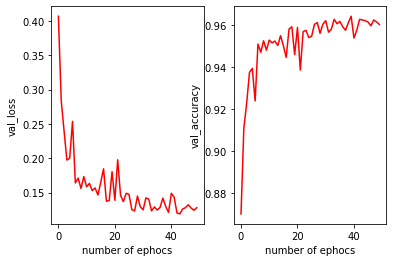

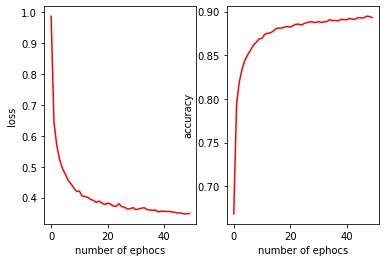

In [18]:
plt.subplot(1,2,1)
plt.plot(history.history["val_loss"],color="r",label="validation loss")
plt.xlabel("number of ephocs")
plt.ylabel("val_loss")

plt.subplot(1,2,2)
plt.plot(history.history["val_accuracy"],color="r",label="validation accuracy")
plt.xlabel("number of ephocs")
plt.ylabel("val_accuracy")

plt.show()

plt.subplot(1,2,1)
plt.plot(history.history["loss"],color="r",label="loss")
plt.xlabel("number of ephocs")
plt.ylabel("loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],color="r",label="accuracy")
plt.xlabel("number of ephocs")
plt.ylabel("accuracy")

plt.show()

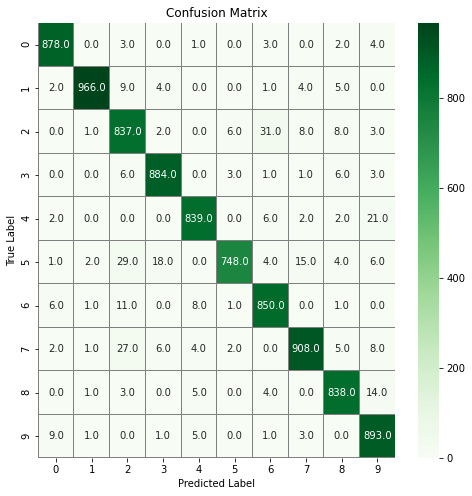

In [19]:
Y_pred = model.predict(x_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<a id="5"><br></a>
## Arranging Test Data

In [20]:
x_test=test.drop("label",axis=1)

x_test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_test=test.label

y_test.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [22]:
x_test=x_test/255.0
x_test=x_test.values.reshape(-1,28,28,1)

x_test.shape

(10000, 28, 28, 1)

In [23]:
y_test=to_categorical(y_test,num_classes=10)

y_test.shape

(10000, 10)

<a id="6"><br></a>
## Fitting Model on Test

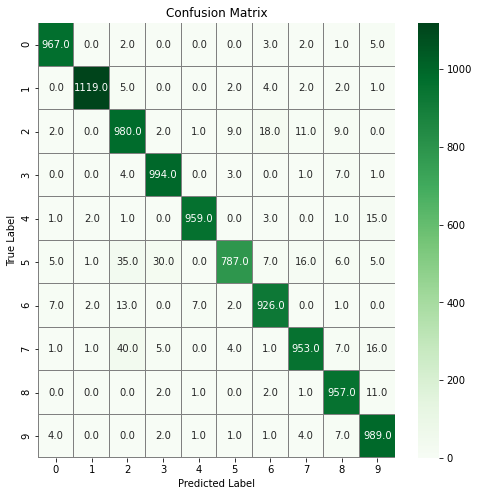

In [24]:
Y_pred = model.predict(x_test)
 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()